In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data_file = "Resources/Seasons_Stats.csv"
stats_pd = pd.read_csv(data_file)
stats_pd.head(5)

,Unnamed: 0,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [3]:
data_file2 = "Resources/Players.csv"
players_pd = pd.read_csv(data_file2)
players_pd.head(2)

,Unnamed: 0,Player,height,weight,collage,born,birth_city,birth_state
0,0,Curly Armstrong,180.0,77.0,Indiana University,1918.0,NaN,NaN
1,1,Cliff Barker,188.0,83.0,University of Kentucky,1921.0,Yorktown,Indiana


In [4]:
join = pd.merge(stats_pd, players_pd, on="Player")
join.tail(2)

,Unnamed: 0_x,Year,Player,Pos,Age,Tm,G,GS,MP,PER,...,TOV,PF,PTS,Unnamed: 0_y,height,weight,collage,born,birth_city,birth_state
24689,24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,...,40.0,78.0,240.0,3920,203.0,97.0,NaN,1994.0,Heidelberg,Germany
24690,24690,2017.0,Ivica Zubac,C,19.0,LAL,38.0,11.0,609.0,17.0,...,30.0,66.0,284.0,3921,216.0,120.0,NaN,1997.0,Mostar,Bosnia and Herzegovina


In [ ]:
join.columns

In [5]:
join_df = join[["Year","Player", "Pos", "Age", "height", "weight", "Tm", "G", "FG", "FGA", "FG%", "3P", "3PA", "3P%", "2P", \
                "2PA", "2P%", "eFG%", "FT", "FTA", "FT%", "TRB", "PF", "PTS", "birth_state"]]
join_df.head(5)

,Year,Player,Pos,Age,height,weight,Tm,G,FG,FGA,...,2PA,2P%,eFG%,FT,FTA,FT%,TRB,PF,PTS,birth_state
0,1950.0,Curly Armstrong,G-F,31.0,180.0,77.0,FTW,63.0,144.0,516.0,...,516.0,0.279,0.279,170.0,241.0,0.705,NaN,217.0,458.0,NaN
1,1951.0,Curly Armstrong,G-F,32.0,180.0,77.0,FTW,38.0,72.0,232.0,...,232.0,0.310,0.310,58.0,90.0,0.644,89.0,97.0,202.0,NaN
2,1950.0,Cliff Barker,SG,29.0,188.0,83.0,INO,49.0,102.0,274.0,...,274.0,0.372,0.372,75.0,106.0,0.708,NaN,99.0,279.0,Indiana
3,1951.0,Cliff Barker,SG,30.0,188.0,83.0,INO,56.0,51.0,202.0,...,202.0,0.252,0.252,50.0,77.0,0.649,100.0,98.0,152.0,Indiana
4,1952.0,Cliff Barker,SG,31.0,188.0,83.0,INO,44.0,48.0,161.0,...,161.0,0.298,0.298,30.0,51.0,0.588,81.0,56.0,126.0,Indiana


In [8]:
yearly_df = join_df.groupby("Year", as_index=False)

In [9]:
yearly_mean = yearly_df[["Age", "height", "weight", "G", "PTS", "3P", "2P", "FT", "3P%", "2P%", "FT%", "eFG%", "PF"]].mean()
yearly_mean.head(3)

,Year,Age,height,weight,G,PTS,3P,2P,FT,3P%,2P%,FT%,eFG%,PF
0,1950.0,26.131410,191.926282,86.884615,42.884615,331.929487,NaN,116.782051,98.365385,NaN,0.318109,0.683685,0.318109,114.990385
1,1951.0,26.344828,193.224138,88.068966,43.890805,375.505747,NaN,133.419540,108.666667,NaN,0.332741,0.701023,0.332741,123.494253
2,1952.0,26.130769,193.292308,88.292308,49.415385,446.892308,NaN,157.892308,131.107692,NaN,0.344500,0.691977,0.344500,144.523077


In [10]:
yearly_mean.tail(3)

,Year,Age,height,weight,G,PTS,3P,2P,FT,3P%,2P%,FT%,eFG%,PF
65,2015.0,26.500768,200.207373,98.597542,45.960061,428.067588,33.917051,126.861751,72.592934,0.286454,0.461369,0.722800,0.472817,87.199693
66,2016.0,26.823529,200.096886,98.501730,49.162630,465.636678,38.970588,134.397924,79.929066,0.297648,0.477975,0.739877,0.490890,92.674740
67,2017.0,26.406723,200.684034,98.596639,48.433613,474.732773,43.932773,131.532773,79.868908,0.301148,0.486453,0.737637,0.494481,90.226891


In [19]:
year_v = []
height_v = []
weight_v = []
G_v = []
PTS_v = []
P2_v = []
P3_v = []
FT_v = []
P2p_v = []
P3p_v = []
FTp_v = []
eFGp_v = []
PF_v = []

for i in range(len(yearly_mean)):
    year_n = yearly_mean["Year"][i]
    height_n = yearly_mean["height"][i]
    weight_n = yearly_mean["weight"][i]
    G_n = yearly_mean["G"][i]
    PTS_n = yearly_mean["PTS"][i]
    P2_n = yearly_mean["2P"][i]
    P3_n = yearly_mean["3P"][i]
    FT_n = yearly_mean["FT"][i]
    P2p_n = yearly_mean["2P%"][i]
    P3p_n = yearly_mean["3P%"][i]
    FTp_n = yearly_mean["FT%"][i]
    eFGp_n = yearly_mean["eFG%"][i]
    PF_n = yearly_mean["PF"][i]
    
    year_v.append(year_n)
    height_v.append(height_n)
    weight_v.append(weight_n)
    G_v.append(G_n)
    PTS_v.append(PTS_n)
    P2_v.append(P2_n)
    P3_v.append(P3_n)
    FT_v.append(FT_n)
    P2p_v.append(P2p_n)
    P3p_v.append(P3p_n)
    FTp_v.append(FT_n)
    eFGp_v.append(eFGp_n)
    PF_v.append(PF_n)

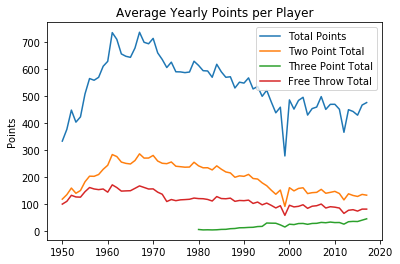

In [25]:
x_axis = year_v
tot_points, = plt.plot(x_axis, PTS_v, label = "Total Points")
two_points, = plt.plot(x_axis, P2_v, label = "Two Point Total")
three_points, = plt.plot(x_axis, P3_v, label = "Three Point Total")
free_throw, = plt.plot(x_axis, FT_v, label = "Free Throw Total")
plt.ylabel("Points")
plt.title("Average Yearly Points per Player")
plt.grid
plt.legend(handles=[tot_points, two_points, three_points, free_throw], loc="best")
plt.savefig("Images/Line_Graph_Point_Breakdown")
plt.show()